# Contents
#### 1. Importing libraries
#### 2. Importing data
#### 3. Exploratory data analysis

# 1. Importing libraries

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [10]:
path = r'/Users/zoegyftopoulos/Documents/Data Projects/07-2024 Instacart Basket Analysis'

In [12]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ord_prods_cust_f.pkl'))

# 3. Exploratory Data Analysis

### Most ordered products

In [26]:
best_sellers = df['product_name'].value_counts().nlargest(10).reset_index()

In [28]:
best_sellers

,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


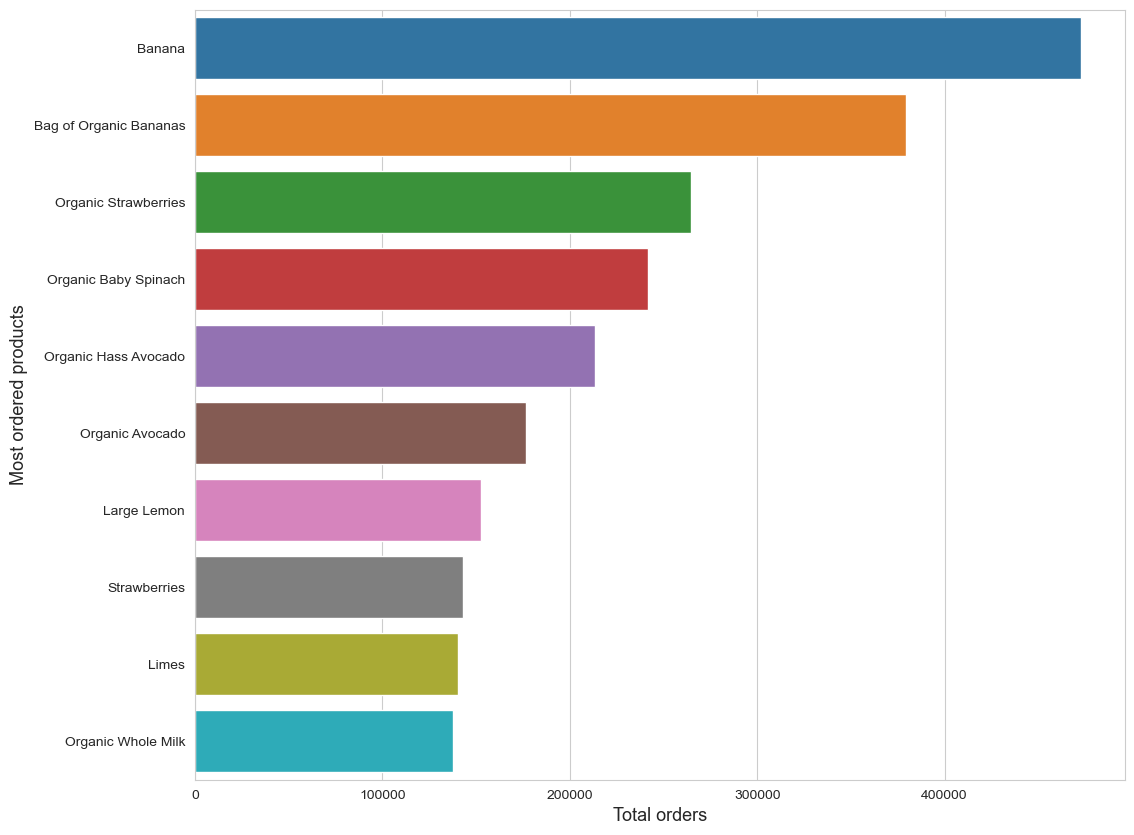

In [95]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=best_sellers, x='count', y='product_name')
plt.ylabel('Most ordered products', fontsize=13)
plt.xlabel('Total orders', fontsize=13)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'best_sellers.png'), bbox_inches = 'tight')
plt.show()

### Most ordered from aisles

In [49]:
pop_aisles = df['aisle'].value_counts().nlargest(10).reset_index()
pop_aisles

,aisle,count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,890317
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


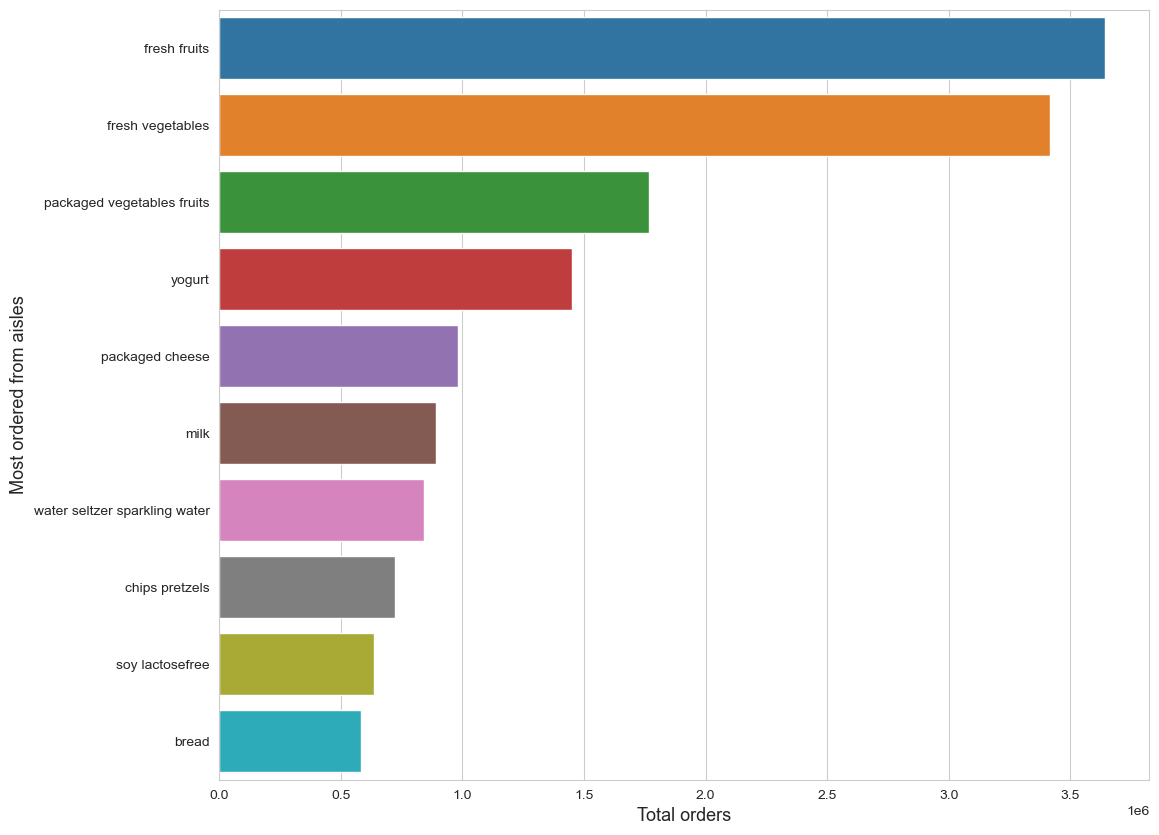

In [99]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=pop_aisles, x='count', y='aisle')
plt.ylabel('Most ordered from aisles', fontsize=13)
plt.xlabel('Total orders', fontsize=13)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'most_ordered_from_aisles.png'), bbox_inches = 'tight')
plt.show()

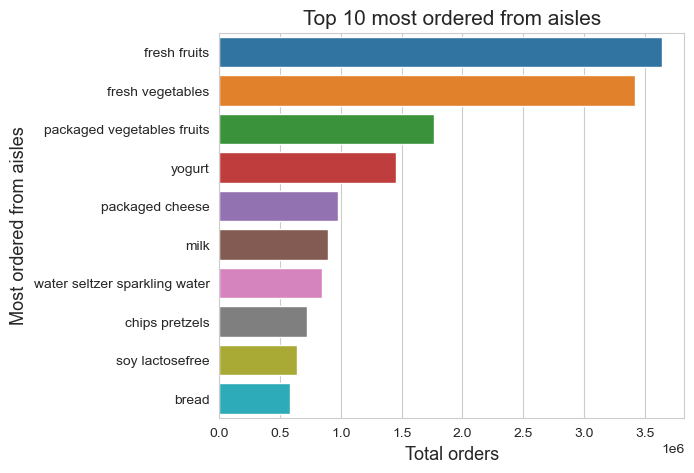

In [101]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(data=pop_aisles, x='count', y='aisle')
plt.ylabel('Most ordered from aisles', fontsize=13)
plt.xlabel('Total orders', fontsize=13)
plt.title('Top 10 most ordered from aisles', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'most_ordered_from_aisles.png'), bbox_inches = 'tight')
plt.show()

### Most ordered from departments

In [56]:
pop_dep = df['department'].value_counts().nlargest(10).reset_index()
pop_dep

,department,count
0,produce,9479291
1,dairy eggs,5408889
2,snacks,2887550
3,beverages,2688159
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


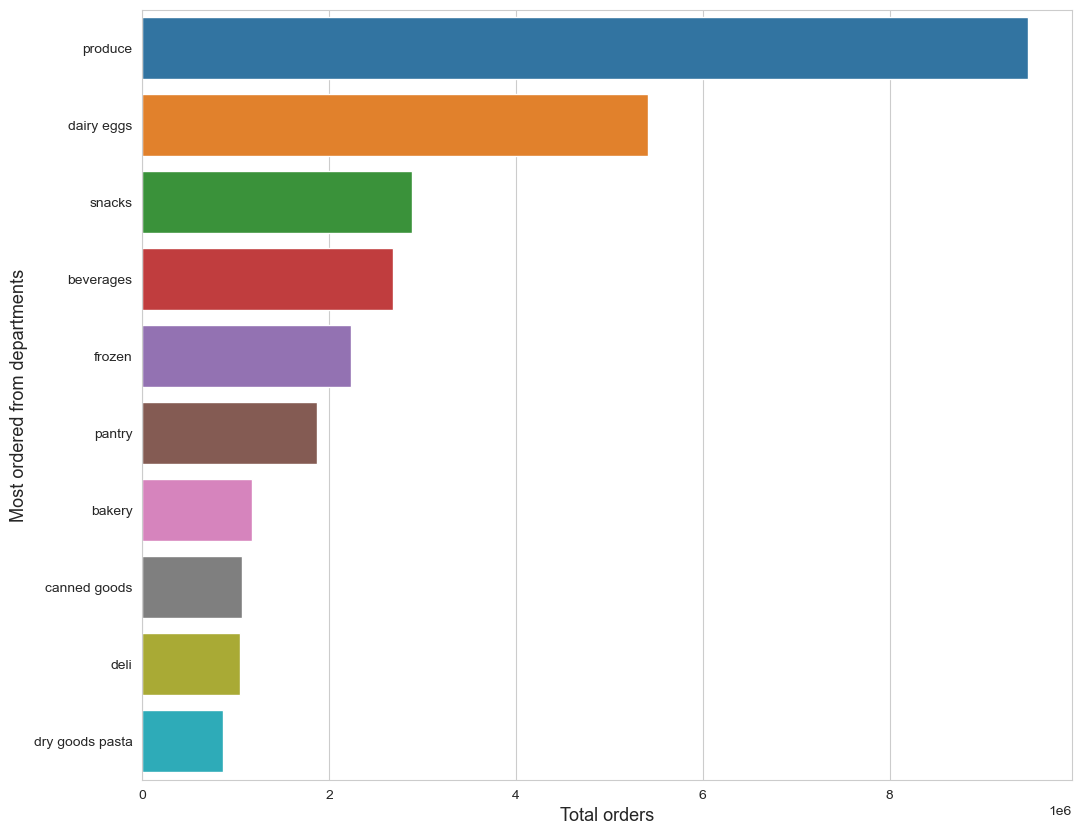

In [103]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=pop_dep, x='count', y='department')
plt.ylabel('Most ordered from departments', fontsize=13)
plt.xlabel('Total orders', fontsize=13)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'most_ordered_from_departments.png'), bbox_inches = 'tight')
plt.show()

### Orders by days of the week

In [73]:
order_day = df['orders_day_of_week'].value_counts().reset_index().sort_values('orders_day_of_week')
order_day

,orders_day_of_week,count
0,0,6208557
1,1,5664672
3,2,4216885
5,3,3843260
6,4,3786412
4,5,4208619
2,6,4499498


In [75]:
day_dict = {0:'Saturday', 1: 'Sunday', 2: 'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}

In [81]:
order_day['orders_day_of_week'] = order_day['orders_day_of_week'].map(day_dict)

In [433]:
order_day

,orders_day_of_week,count
0,Saturday,6208557
1,Sunday,5664672
3,Monday,4216885
5,Tuesday,3843260
6,Wednesday,3786412
4,Thursday,4208619
2,Friday,4499498


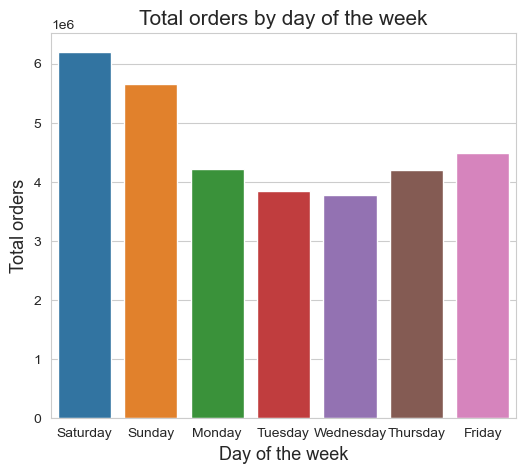

In [439]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(data=order_day, x='orders_day_of_week', y='count')
plt.ylabel('Total orders', fontsize=13)
plt.xlabel('Day of the week', fontsize=13)
plt.title('Total orders by day of the week', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Total orders by day of the week.png'), bbox_inches = 'tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


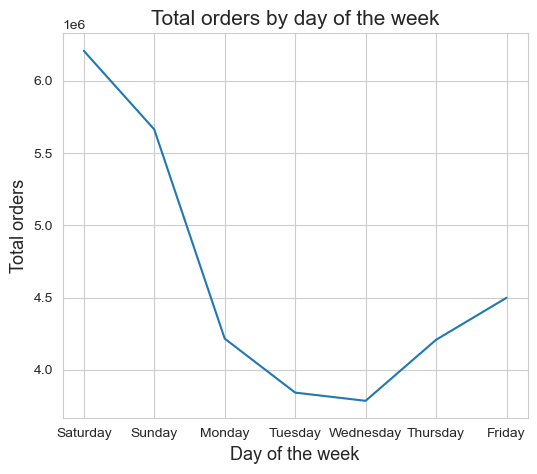

In [437]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=order_day, x='orders_day_of_week', y='count')
plt.ylabel('Total orders', fontsize=13)
plt.xlabel('Day of the week', fontsize=13)
plt.title('Total orders by day of the week', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Total orders by day of the week line.png'), bbox_inches = 'tight')
plt.show()

### Orders by hour of the day

In [111]:
order_time = df['order_time'].value_counts().reset_index().sort_values('order_time')
order_time

,order_time,count
18,0,218898
19,1,115763
21,2,69414
23,3,51304
22,4,53270
20,5,88037
17,6,290720
13,7,891769
9,8,1719633
7,9,2456230


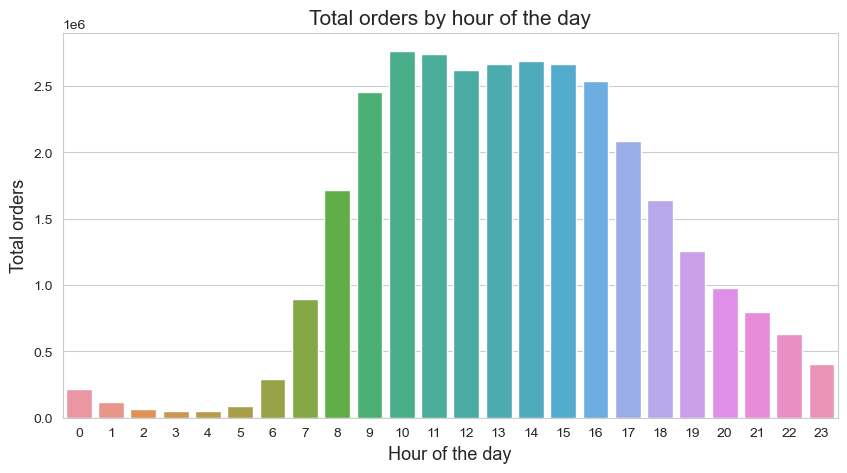

In [119]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=order_time, x='order_time', y='count')
plt.ylabel('Total orders', fontsize=13)
plt.xlabel('Hour of the day', fontsize=13)
plt.title('Total orders by hour of the day', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Total orders by hour of the day.png'), bbox_inches = 'tight')
plt.show()

### Purchase amount by hour of the day 

In [122]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_betw_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'age_group', 'income_group', 'dep_group', 'department', 'aisle'],
      dtype='object')

In [128]:
# Create a sample subset 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [130]:
big = df[dev]

In [131]:
small = df[~dev]

In [132]:
len(df)

32427903

In [136]:
len(big) + len(small)

32427903

In [138]:
df_order_time_prices = small[['order_time','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


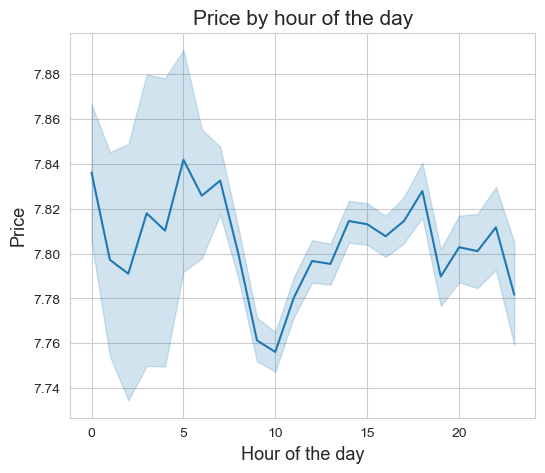

In [150]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=df_order_time_prices, x='order_time', y='prices')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Hour of the day', fontsize=13)
plt.title('Price by hour of the day', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price by hour of the day.png'), bbox_inches = 'tight')
plt.show()

### Distributions of created variables

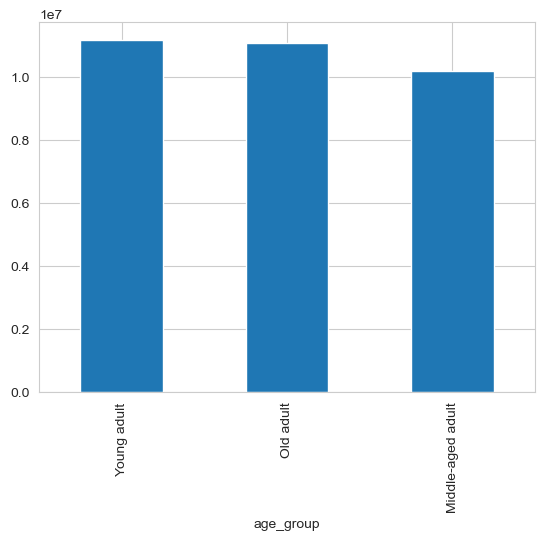

In [160]:
bar_age_groups = df['age_group'].value_counts().plot.bar()

In [162]:
bar_age_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_age_groups.png'), bbox_inches = 'tight')

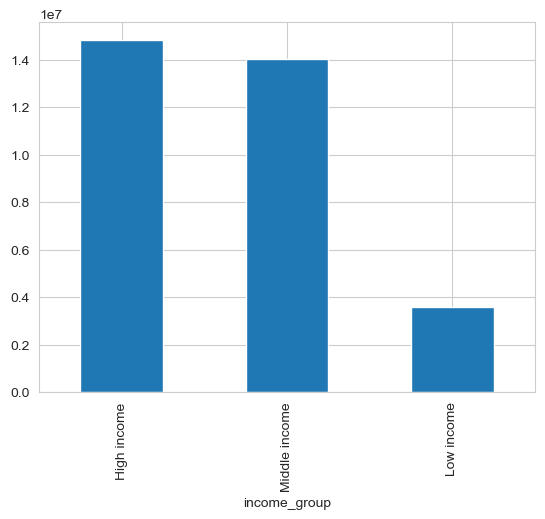

In [165]:
bar_income_groups = df['income_group'].value_counts().plot.bar()

In [167]:
bar_income_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_income_groups.png'), bbox_inches = 'tight')

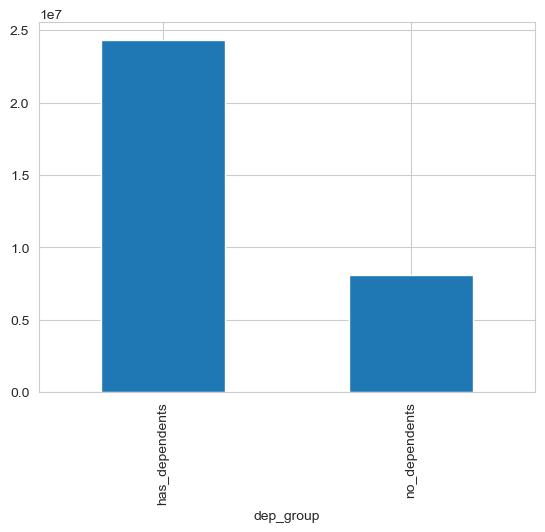

In [169]:
bar_dep_groups = df['dep_group'].value_counts().plot.bar()

In [171]:
bar_dep_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_dependents_groups.png'), bbox_inches = 'tight')

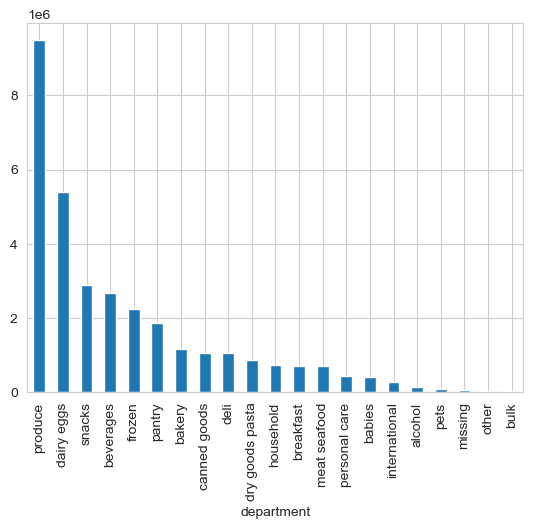

In [173]:
bar_depart_groups = df['department'].value_counts().plot.bar()

In [175]:
bar_depart_groups.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_departments.png'), bbox_inches = 'tight')

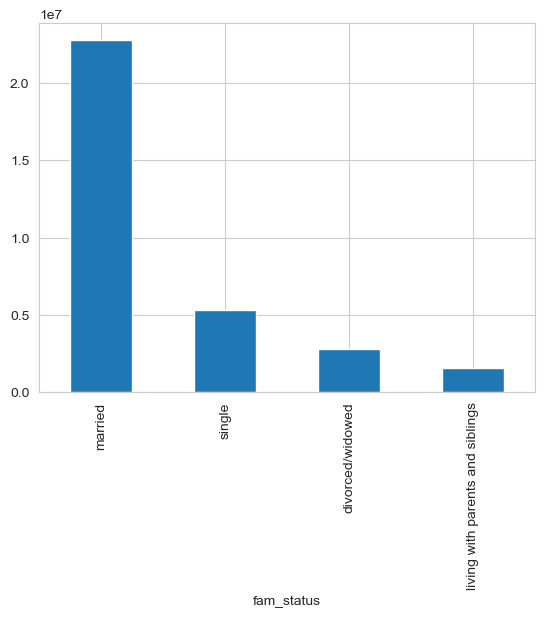

In [184]:
bar_fam_status = df['fam_status'].value_counts().plot.bar()

In [186]:
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_family_status.png'), bbox_inches = 'tight')

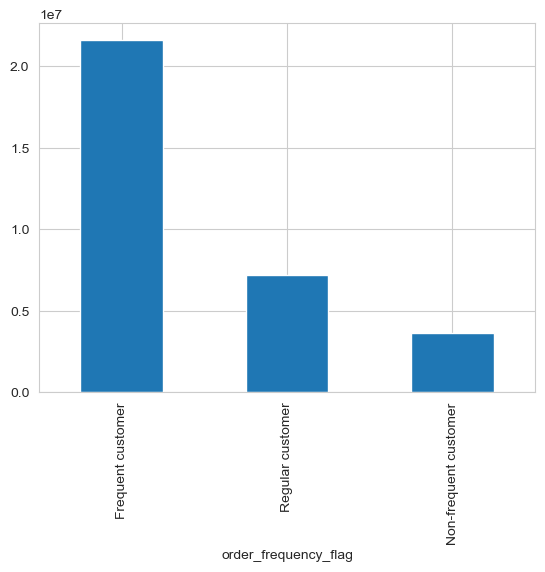

In [191]:
bar_frequency_flag = df['order_frequency_flag'].value_counts().plot.bar()

## Explore relationships

### Age group by purchase frequency

In [207]:
age_freq = pd.crosstab(df['age_group'], df['order_frequency_flag'], dropna = False)
age_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Middle-aged adult,6767122,1149966,2263746
Old adult,7381432,1241571,2452049
Young adult,7425005,1247357,2499655


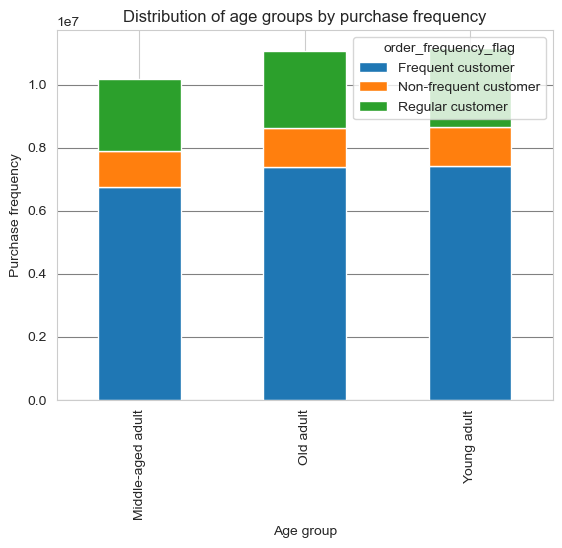

In [209]:
age_freq = age_freq.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of age groups by purchase frequency')
plt.ylabel('Purchase frequency')
plt.xlabel('Age group')
age_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_by_purchase_frequency.png'), bbox_inches='tight')

### Age group by loyalty

In [329]:
age_loy = pd.crosstab(df['age_group'], df['loyalty_flag'], dropna = False)
age_loy

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Middle-aged adult,3252733,1963706,4964395
Old adult,3517173,2144154,5413725
Young adult,3522198,2140129,5509690


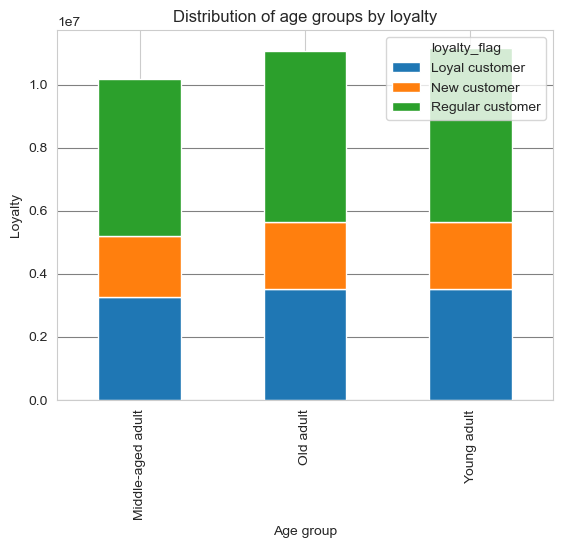

In [330]:
age_loy = age_loy.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of age groups by loyalty')
plt.ylabel('Loyalty')
plt.xlabel('Age group')
age_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_by_loyalty.png'), bbox_inches='tight')

### Age group by spending

In [335]:
age_spen = pd.crosstab(df['age_group'], df['spending_flag'], dropna = False)
age_spen

spending_flag,High spender,Low spender
age_group,,
Middle-aged adult,204934,9975900
Old adult,215217,10859835
Young adult,210176,10961841


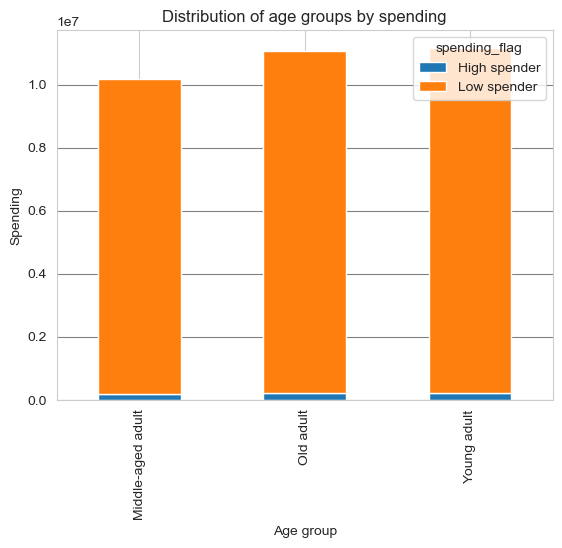

In [336]:
age_spen = age_spen.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of age groups by spending')
plt.ylabel('Spending')
plt.xlabel('Age group')
age_spen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_by_spending.png'), bbox_inches='tight')

### Age group by price-range of product

In [339]:
age_price_range = pd.crosstab(df['age_group'], df['price_range_loc'], dropna = False)
age_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
age_group,,,
Middle-aged adult,129693,3179032,6872109
Old adult,141791,3456619,7476642
Young adult,141071,3490688,7540258


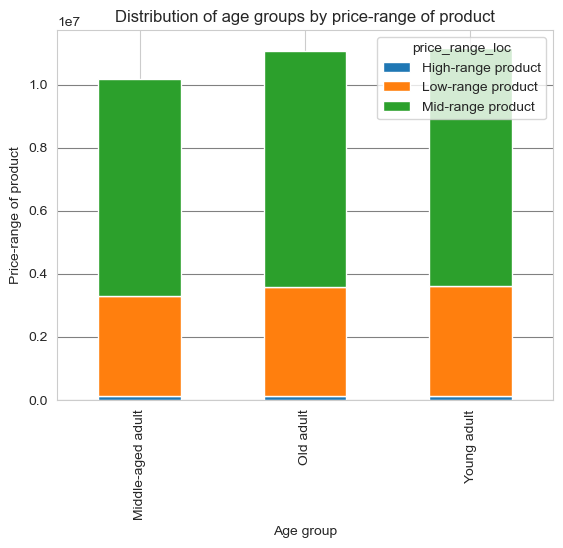

In [340]:
age_price_range = age_price_range.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of age groups by price-range of product')
plt.ylabel('Price-range of product')
plt.xlabel('Age group')
age_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups_by_price_range_of_product.png'), bbox_inches='tight')

### Dependents by frequency

In [341]:
dep_freq = pd.crosstab(df['dep_group'], df['order_frequency_flag'], dropna = False)
dep_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
dep_group,,,
has_dependents,16194692,2740964,5388634
no_dependents,5378867,897930,1826816


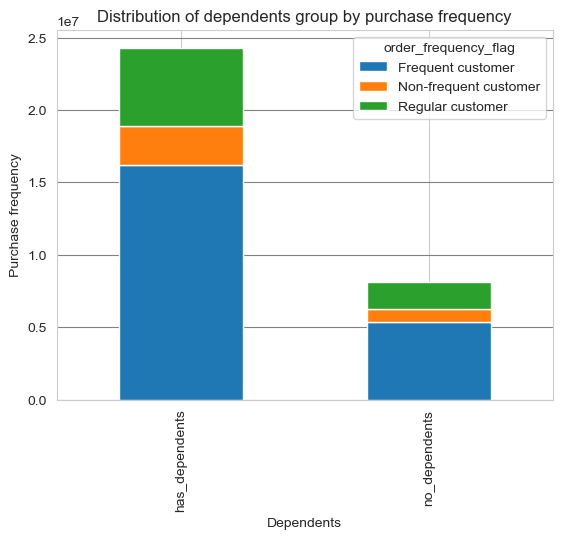

In [344]:
dep_freq = dep_freq.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of dependents group by purchase frequency')
plt.ylabel('Purchase frequency')
plt.xlabel('Dependents')
dep_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_group_by_purchase_frequency.png'), bbox_inches='tight')

### Dependents by loyalty

In [345]:
dep_loy = pd.crosstab(df['dep_group'], df['loyalty_flag'], dropna = False)
dep_loy

loyalty_flag,Loyal customer,New customer,Regular customer
dep_group,,,
has_dependents,7700915,4687866,11935509
no_dependents,2591189,1560123,3952301


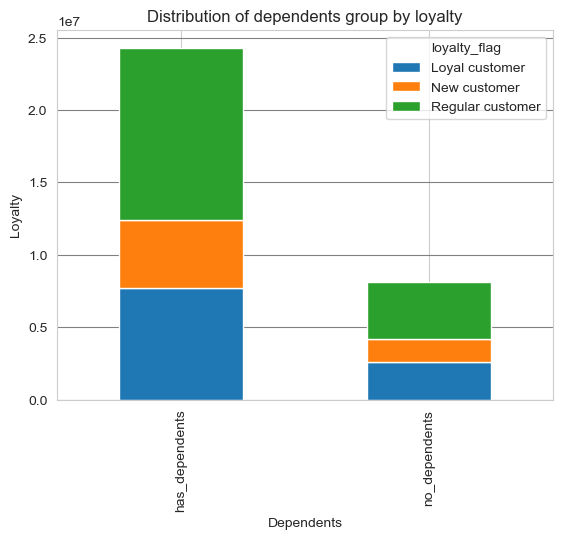

In [346]:
dep_loy = dep_loy.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of dependents group by loyalty')
plt.ylabel('Loyalty')
plt.xlabel('Dependents')
dep_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_group_by_loyalty.png'), bbox_inches='tight')

### Dependents by price-range of product

In [349]:
dep_price_range = pd.crosstab(df['dep_group'], df['price_range_loc'], dropna = False)
dep_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
dep_group,,,
has_dependents,311605,7595008,16417677
no_dependents,100950,2531331,5471332


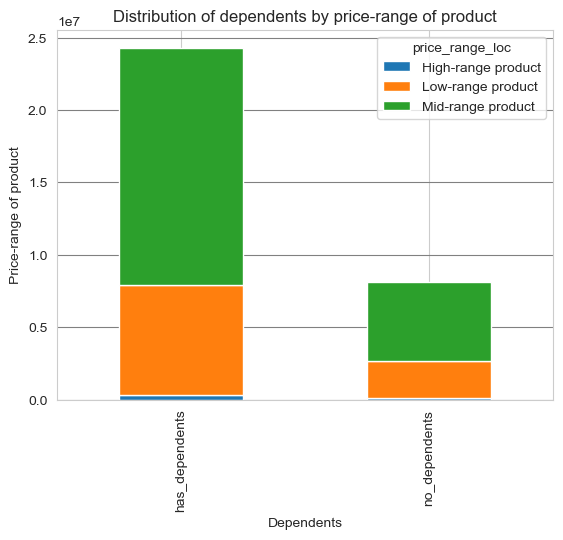

In [352]:
dep_price_range = dep_price_range.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of dependents by price-range of product')
plt.ylabel('Price-range of product')
plt.xlabel('Dependents')
dep_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_by_price_range_of_product.png'), bbox_inches='tight')

### Income by frequency

In [353]:
inc_freq = pd.crosstab(df['income_group'], df['order_frequency_flag'], dropna = False)
inc_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High income,9935524,1601767,3284685
Low income,2259403,496781,841549
Middle income,9378632,1540346,3089216


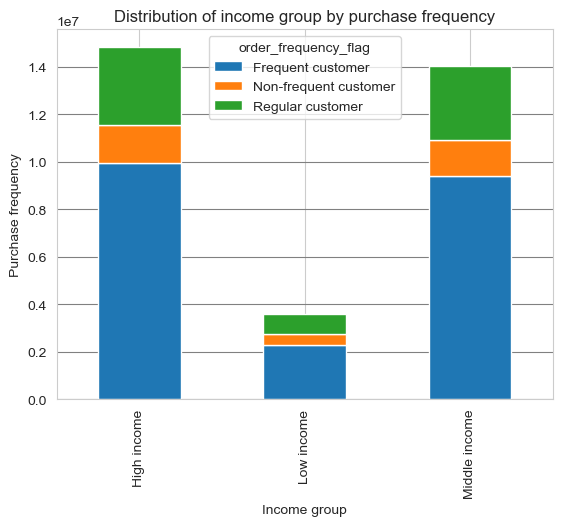

In [354]:
inc_freq = inc_freq.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of income group by purchase frequency')
plt.ylabel('Purchase frequency')
plt.xlabel('Income group')
inc_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_by_purchase_frequency.png'), bbox_inches='tight')

### Income by loyalty

In [357]:
inc_loy = pd.crosstab(df['income_group'], df['loyalty_flag'], dropna = False)
inc_loy

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
High income,4760659,2752105,7309212
Low income,1034165,859505,1704063
Middle income,4497280,2636379,6874535


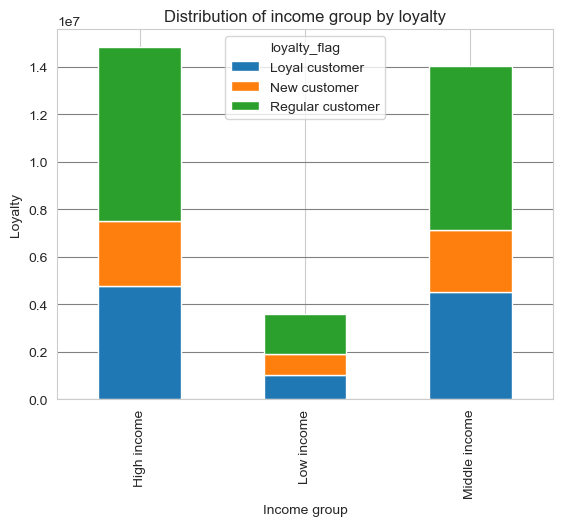

In [358]:
inc_loy = inc_loy.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of income group by loyalty')
plt.ylabel('Loyalty')
plt.xlabel('Income group')
inc_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_by_loyalty.png'), bbox_inches='tight')

### Income by price-range of product

In [389]:
inc_price_range = pd.crosstab(df['income_group'], df['price_range_loc'], dropna = False)
inc_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
income_group,,,
High income,207050,4400813,10214113
Low income,18830,1489514,2089389
Middle income,186675,4236012,9585507


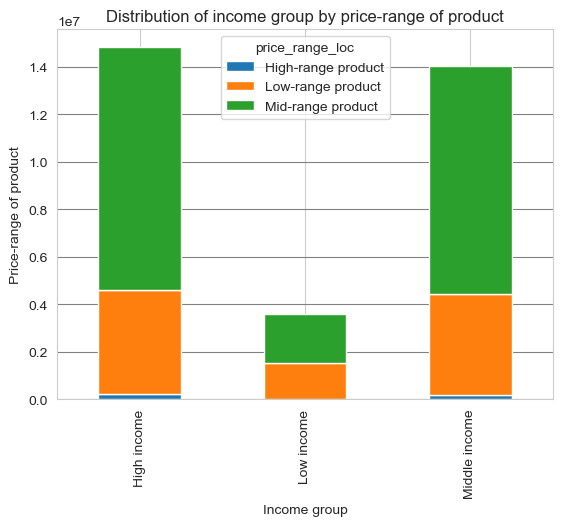

In [391]:
inc_price_range = inc_price_range.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray')
plt.title('Distribution of income group by price-range of product')
plt.ylabel('Price-range of product')
plt.xlabel('Income group')
inc_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_by_price_range_of_product.png'), bbox_inches='tight')

### Family status by frequency

In [421]:
fam_freq = pd.crosstab(df['fam_status'], df['order_frequency_flag'], dropna = False).sort_index(axis=1, ascending=False)
fam_freq

order_frequency_flag,Regular customer,Non-frequent customer,Frequent customer
fam_status,,,
divorced/widowed,613811,307215,1852832
living with parents and siblings,328634,175282,1047947
married,5060000,2565682,15146745
single,1213005,590715,3526035


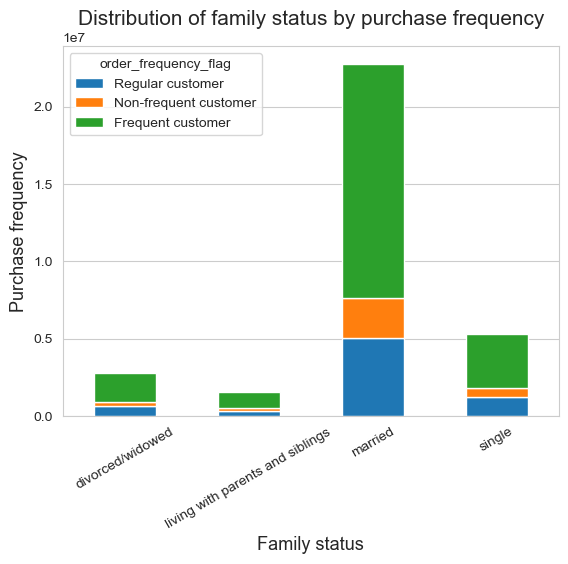

In [422]:
fam_freq = fam_freq.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'x')
plt.title('Distribution of family status by purchase frequency', fontsize=15)
plt.ylabel('Purchase frequency', fontsize=13)
plt.xlabel('Family status', fontsize=13)
plt.xticks(rotation=30)
fam_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_by_purchase_frequency.png'), bbox_inches='tight')

### Family status by loyalty

In [367]:
fam_loy = pd.crosstab(df['fam_status'], df['loyalty_flag'], dropna = False)
fam_loy

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,883352,530671,1359835
living with parents and siblings,493181,291407,767275
married,7207734,4396459,11168234
single,1707837,1029452,2592466


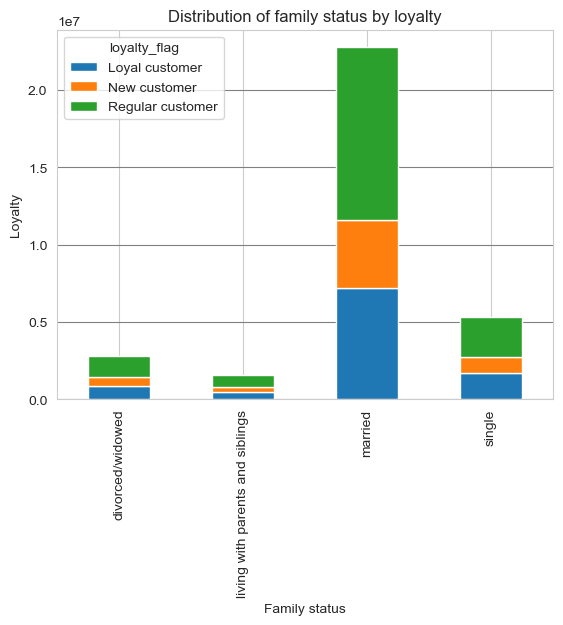

In [370]:
fam_loy = fam_loy.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'gray', linestyle = 'solid')
plt.title('Distribution of family status by loyalty')
plt.ylabel('Loyalty')
plt.xlabel('Family status')
fam_loy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_by_loyalty.png'), bbox_inches='tight')

### Family status by price-range of product

In [429]:
fam_price_range = pd.crosstab(df['fam_status'], df['price_range_loc'], dropna = False)
fam_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
fam_status,,,
divorced/widowed,35311,865940,1872607
living with parents and siblings,19767,483461,1048635
married,291838,7111547,15369042
single,65639,1665391,3598725


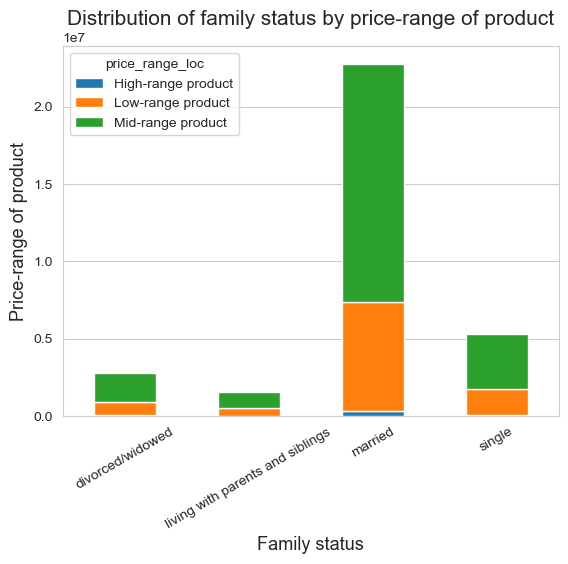

In [430]:
fam_price_range = fam_price_range.plot(kind = 'bar', stacked = True)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'x')
plt.title('Distribution of family status by price-range of product', fontsize=15)
plt.ylabel('Price-range of product', fontsize=13)
plt.xlabel('Family status', fontsize=13)
plt.xticks(rotation=30)
fam_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_by_price_range_of_product.png'), bbox_inches='tight')

### Create subsets based on family status

In [294]:
df_mar = df[df['fam_status'] == 'married']

In [295]:
df_mar.shape

(22772427, 39)

In [300]:
df_not_mar = df[df['fam_status'] != 'married']

In [301]:
df_not_mar.shape

(9655476, 39)

In [304]:
df.shape

(32427903, 39)

### Check top products, aisles & departments for different family statuses

In [309]:
best_sellers_mar = df_mar['product_name'].value_counts().nlargest(10).reset_index()
best_sellers_mar

,product_name,count
0,Banana,331141
1,Bag of Organic Bananas,266504
2,Organic Strawberries,185691
3,Organic Baby Spinach,169850
4,Organic Hass Avocado,149915
5,Organic Avocado,124790
6,Large Lemon,107310
7,Strawberries,100512
8,Limes,98636
9,Organic Whole Milk,97143


In [311]:
best_sellers

,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [313]:
best_sellers_not_mar = df_not_mar['product_name'].value_counts().nlargest(10).reset_index()
best_sellers_not_mar

,product_name,count
0,Banana,141424
1,Bag of Organic Bananas,112946
2,Organic Strawberries,78992
3,Organic Baby Spinach,72071
4,Organic Hass Avocado,63669
5,Organic Avocado,52025
6,Large Lemon,45347
7,Strawberries,42439
8,Limes,41991
9,Organic Raspberries,41172


In [315]:
pop_aisles

,aisle,count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,890317
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


In [317]:
pop_aisles_mar = df_mar['aisle'].value_counts().nlargest(10).reset_index()
pop_aisles_mar

,aisle,count
0,fresh fruits,2558033
1,fresh vegetables,2398417
2,packaged vegetables fruits,1238621
3,yogurt,1017115
4,packaged cheese,687531
5,milk,624346
6,water seltzer sparkling water,591148
7,chips pretzels,507974
8,soy lactosefree,449219
9,bread,409163


In [319]:
pop_aisles_not_mar = df_not_mar['aisle'].value_counts().nlargest(10).reset_index()
pop_aisles_not_mar

,aisle,count
0,fresh fruits,1084155
1,fresh vegetables,1019604
2,packaged vegetables fruits,526692
3,yogurt,435228
4,packaged cheese,292232
5,milk,265971
6,water seltzer sparkling water,250385
7,chips pretzels,214496
8,soy lactosefree,189034
9,bread,175671


In [321]:
pop_dep

,department,count
0,produce,9479291
1,dairy eggs,5408889
2,snacks,2887550
3,beverages,2688159
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


In [323]:
pop_dep_mar = df_mar['department'].value_counts().nlargest(10).reset_index()
pop_dep_mar

,department,count
0,produce,6654218
1,dairy eggs,3795294
2,snacks,2029589
3,beverages,1889078
4,frozen,1570238
5,pantry,1318468
6,bakery,824872
7,canned goods,752030
8,deli,735689
9,dry goods pasta,609663


In [325]:
pop_dep_not_mar = df_not_mar['department'].value_counts().nlargest(10).reset_index()
pop_dep_not_mar

,department,count
0,produce,2825073
1,dairy eggs,1613595
2,snacks,857961
3,beverages,799081
4,frozen,666194
5,pantry,557109
6,bakery,351915
7,canned goods,316028
8,deli,315560
9,dry goods pasta,256964


### More visualizations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


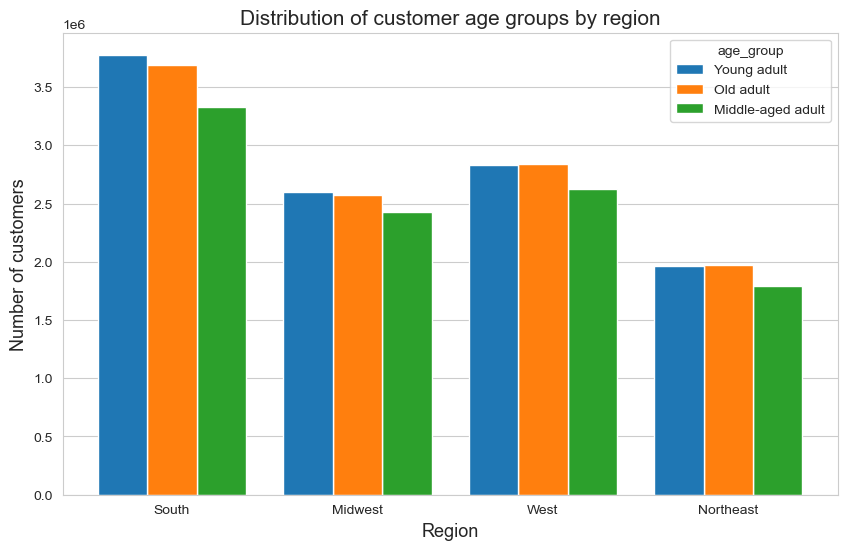

In [447]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'region', hue = 'age_group', multiple = 'dodge', shrink = .8, alpha = 1)
plt.gca().set_axisbelow(True)  
plt.grid(axis = 'x')
plt.title('Distribution of customer age groups by region', fontsize=15)
plt.ylabel('Number of customers', fontsize=13)
plt.xlabel('Region', fontsize=13)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_by_region_n.png'), bbox_inches = 'tight') 
plt.show()

In [486]:
income_count = df['income_group'].value_counts(dropna=False).reset_index()
income_count

,income_group,count
0,High income,14821976
1,Middle income,14008194
2,Low income,3597733


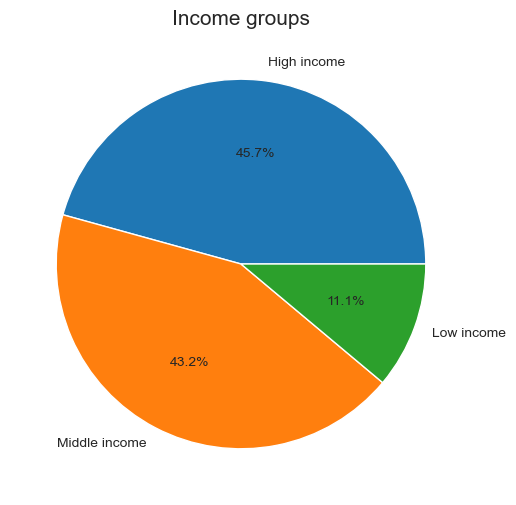

In [512]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(income_count['count'], labels=income_count['income_group'], autopct='%1.1f%%')
plt.title('Income groups', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_groups_pie_chart.png'), bbox_inches = 'tight') 
plt.show()

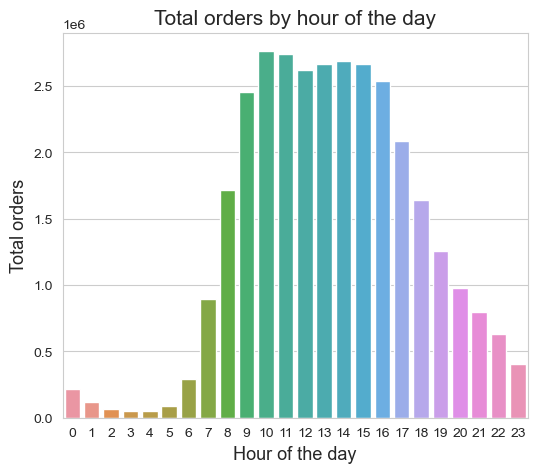

In [504]:
sns.set_style('whitegrid')
sns.color_palette('tab10')
f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(data=order_time, x='order_time', y='count')
plt.ylabel('Total orders', fontsize=13)
plt.xlabel('Hour of the day', fontsize=13)
plt.title('Total orders by hour of the day', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Total orders by hour of the day_n.png'), bbox_inches = 'tight')
plt.show()

In [514]:
loyalty_count = df['loyalty_flag'].value_counts(dropna=False).reset_index()
loyalty_count

,loyalty_flag,count
0,Regular customer,15887810
1,Loyal customer,10292104
2,New customer,6247989


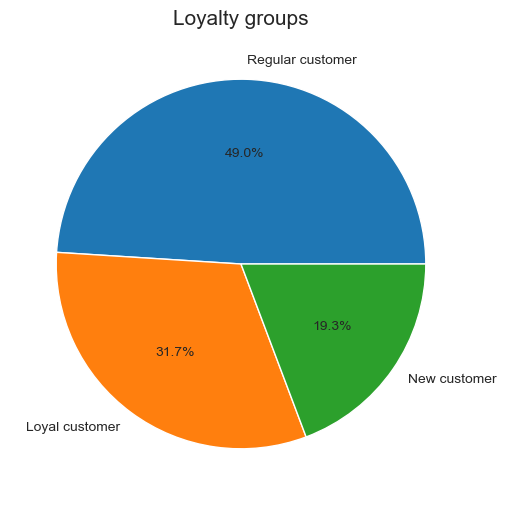

In [516]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(loyalty_count['count'], labels=loyalty_count['loyalty_flag'], autopct='%1.1f%%')
plt.title('Loyalty groups', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_pie_chart.png'), bbox_inches = 'tight') 
plt.show()

In [521]:
price_range_count = df['price_range_loc'].value_counts(dropna=False).reset_index()
price_range_count 

,price_range_loc,count
0,Mid-range product,21889009
1,Low-range product,10126339
2,High-range product,412555


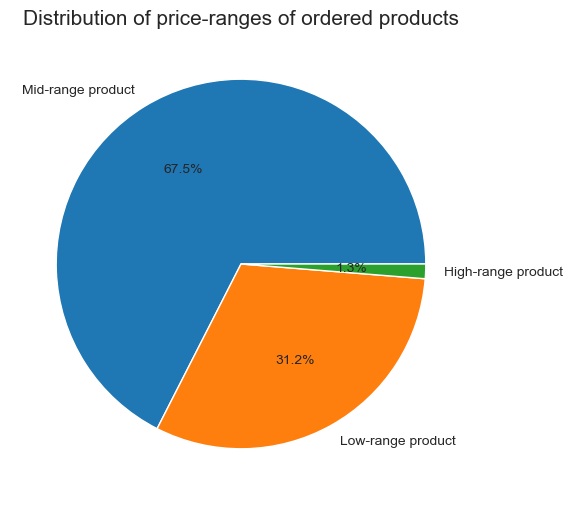

In [525]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(price_range_count ['count'], labels=price_range_count ['price_range_loc'], autopct='%1.1f%%')
plt.title('Distribution of price-ranges of ordered products', fontsize = 15)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_pie_chart.png'), bbox_inches = 'tight') 
plt.show()